In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
from sklearn import metrics

In [6]:
data=pd.read_csv('problem_2_train.csv')

In [8]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [9]:
from sklearn.preprocessing import LabelEncoder
moble=LabelEncoder()

In [14]:
data['mobmake']=moble.fit_transform(data['mobmake'])

claimle=LabelEncoder()
data['claimtype']=claimle.fit_transform(data['claimtype'])

pinle=LabelEncoder()
data['custpincodecategory']=pinle.fit_transform(data['custpincodecategory'])

In [89]:
feature_cols=['mobmake','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','servicecntrid']


In [90]:
X=data[feature_cols]

In [91]:
y=data['tat_in_days']

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
linreg=LinearRegression()


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=3)

In [95]:
linreg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
list(zip(feature_cols,linreg.coef_))

[('mobmake', 0.1300930637836917),
 ('hubpincode', 4.2186924937602485e-07),
 ('pickuppartnerid', -0.008267908339473027),
 ('deliverypartnerid', -0.011078949234706825),
 ('insuranceCompanyId', -0.003304832792274164),
 ('custpincodecategory', 1.0270773476423276),
 ('claimtype', 22.771587798737688),
 ('servicecntrid', -0.0044826455172080155)]

In [97]:
y_pred=linreg.predict(X_test)

In [98]:
import numpy as np

print(np.sqrt(np.mean((y_test-y_pred)**2)))

4.976296275426533


In [99]:
%matplotlib inline

In [ ]:

data=data.drop('custpincode',axis=1)
data=data.drop('memcreateddate',axis=1)
data=data.drop('mobilepurchasedate',axis=1)
data=data.drop('claimintdate',axis=1)
data=data.drop('pickupStartdate',axis=1)

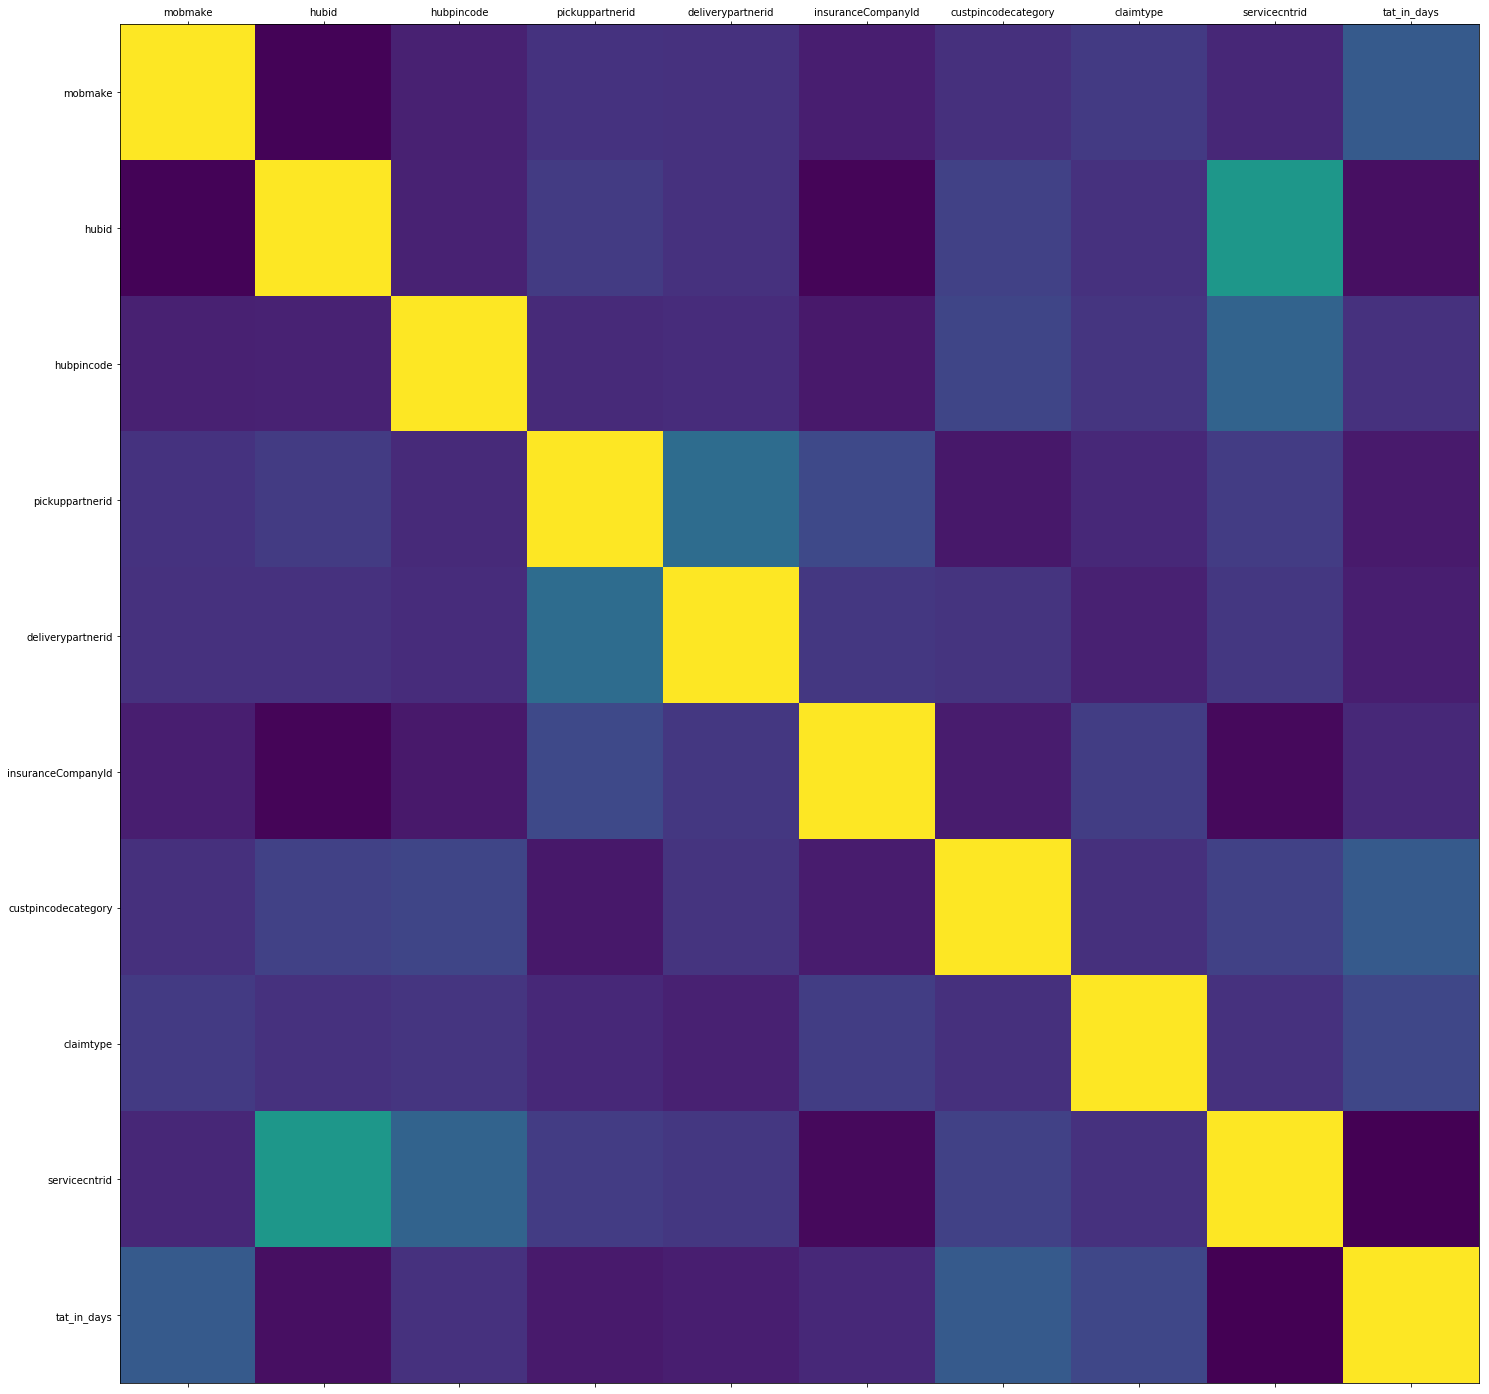

In [101]:

fig, ax = plt.subplots(figsize=(25,25))
ax.matshow(data.corr())


plt.xticks(range(len(data.columns)), data.columns);
plt.yticks(range(len(data.columns)), data.columns);
plt.show()

In [86]:
data.head()

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,12,7,500004,233,233,131,1,0,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,8,10,226010,233,233,131,1,0,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,8,2,110018,233,233,228,1,0,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,11,2,110018,233,233,228,2,0,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,12,21,110015,233,233,131,1,0,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [102]:
data=pd.read_csv('problem_2_train.csv')



In [121]:
c

In [127]:
data.memcreateddate=pd.to_datetime(data.memcreateddate)

data.mobilepurchasedate=pd.to_datetime(data.mobilepurchasedate)

data.claimintdate=pd.to_datetime(data.claimintdate)

data.pickupStartdate=pd.to_datetime(data.pickupStartdate)

data.memcreateddate=pd.DatetimeIndex(data['memcreateddate']).month

data.mobilepurchasedate=pd.DatetimeIndex(data['mobilepurchasedate']).month
data.claimintdate=pd.DatetimeIndex(data['claimintdate']).month
data.pickupStartdate=pd.DatetimeIndex(data['pickupStartdate']).month

In [205]:
feature_cols=['mobmake','hubid','custpincode','deliverypartnerid','insuranceCompanyId','custpincodecategory','servicecntrid','memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate']





In [210]:
X=data[feature_cols]
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
print(np.sqrt(np.mean((y_test-y_pred)**2)))

4.890939905905308


In [211]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,12,7,500004,233,233,131,1,0,500001,1,1,1,4403,1,5
1,2838330,8,10,226010,233,233,131,1,0,226022,1,1,1,4444,1,12
2,2835781,8,2,110018,233,233,228,1,0,110018,1,1,1,4388,1,9
3,2838589,11,2,110018,233,233,228,2,0,124001,1,1,1,4092,1,9
4,2855214,12,21,110015,233,233,131,1,0,201301,1,1,1,4580,1,8


In [212]:
list(zip(feature_cols,linreg.coef_))

[('mobmake', 0.11283357617388166),
 ('hubid', -0.0230740888423072),
 ('custpincode', 1.3539424549052103e-06),
 ('deliverypartnerid', -0.013927353337460367),
 ('insuranceCompanyId', -0.002158851168769384),
 ('custpincodecategory', 1.049064243430353),
 ('servicecntrid', -0.004221186080879433),
 ('memcreateddate', 0.0),
 ('mobilepurchasedate', 0.0),
 ('claimintdate', 0.0),
 ('pickupStartdate', 0.0)]

In [213]:
data.mul1=data.insuranceCompanyId*data.deliverypartnerid

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [197]:
data=data.drop('mu1',axis=1)

In [198]:
testset=pd.read_csv('problem_2_test.csv')

In [199]:
testset.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


(2116, 15)

In [202]:

testset['mobmake']=moble.fit_transform(testset['mobmake'])

claimle=LabelEncoder()
testset['claimtype']=claimle.fit_transform(testset['claimtype'])

pinle=LabelEncoder()
testset['custpincodecategory']=pinle.fit_transform(testset['custpincodecategory'])

In [203]:
testset.memcreateddate=pd.to_datetime(testset.memcreateddate)

testset.mobilepurchasedate=pd.to_datetime(testset.mobilepurchasedate)

testset.claimintdate=pd.to_datetime(testset.claimintdate)

testset.pickupStartdate=pd.to_datetime(testset.pickupStartdate)

testset.memcreateddate=pd.DatetimeIndex(testset['memcreateddate']).month

testset.mobilepurchasedate=pd.DatetimeIndex(testset['mobilepurchasedate']).month
testset.claimintdate=pd.DatetimeIndex(testset['claimintdate']).month
testset.pickupStartdate=pd.DatetimeIndex(testset['pickupStartdate']).month

In [225]:
X=testset[feature_cols]
X.head()

,mobmake,hubid,custpincode,deliverypartnerid,insuranceCompanyId,custpincodecategory,servicecntrid,memcreateddate,mobilepurchasedate,claimintdate,pickupStartdate
0,13,3,560093,233,131,1,4467,7,7,2,2
1,10,2,110034,233,228,1,4388,7,1,2,2
2,10,3,590014,233,228,3,4460,1,1,2,2
3,10,2,250110,233,228,2,4388,8,5,2,2
4,13,22,496001,233,131,3,4581,11,9,2,2


In [220]:
ytest=linreg.predict(X)

In [227]:
ytest.shape

testset=pd.read_csv('problem_2_test.csv')

In [228]:
testset['tat_in_days']=ytest

In [229]:
testset.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06,12.836388
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08,12.035673
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28,14.456667
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26,13.274392
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23,13.928117


In [230]:
testset.to_csv('Problem2.csv')